# Задача Кредитного Скоринга

In [30]:
import pandas as pd
import numpy as np
import scipy as sc

from scipy.stats import chi2_contingency, chi2, norm

import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [31]:
data = pd.read_csv("credit_card_default_analysis.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [32]:
data.shape

(30000, 25)

In [33]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### 1. Размер кредитного лимита

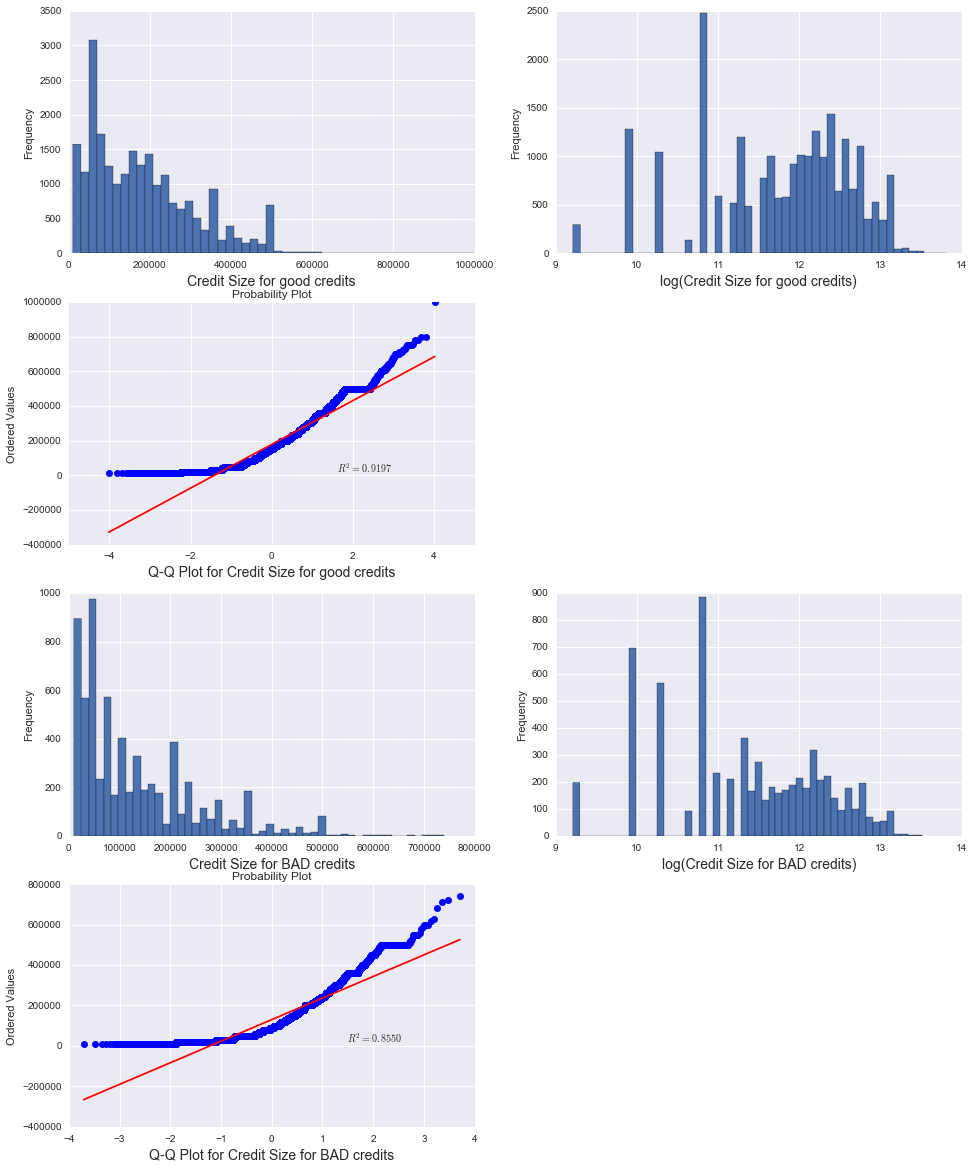

In [34]:
plt.figure(figsize(16, 20))

plt.subplot(421)
data[data['default'] == 0]['LIMIT_BAL'].plot.hist(bins=50)
plt.xlabel('Credit Size for good credits', fontsize=14)

plt.subplot(422)
np.log(data[data['default'] == 0]['LIMIT_BAL']).plot.hist(bins=50)
plt.xlabel('log(Credit Size for good credits)', fontsize=14)

plt.subplot(423)
sc.stats.probplot(data[data['default'] == 0]['LIMIT_BAL'], dist="norm", plot=pylab)
plt.xlabel('Q-Q Plot for Credit Size for good credits', fontsize=14)

plt.subplot(425)
data[data['default'] == 1]['LIMIT_BAL'].plot.hist(bins=50)
plt.xlabel('Credit Size for BAD credits', fontsize=14)

plt.subplot(426)
np.log(data[data['default'] == 1]['LIMIT_BAL']).plot.hist(bins=50)
plt.xlabel('log(Credit Size for BAD credits)', fontsize=14)

plt.subplot(427)
sc.stats.probplot(data[data['default'] == 1]['LIMIT_BAL'], dist="norm", plot=pylab)
plt.xlabel('Q-Q Plot for Credit Size for BAD credits', fontsize=14)

pylab.show()

Распределение размеров кредитов у каждой выборки не похоже на нормальное. Логарифм размеров кредитов тоже не сильно помогает.
Ку-ку-плот подтверждает.
Сделать предположение о нормальности исходных выборок не можем.
Таким образом, задачу будем решать непараметрическими критериями.

Сразу отметим, что выборки у нас, по ходу, независимые. Это понадобится.

Нарисуем "ящики с усами" для каждой из выборок.

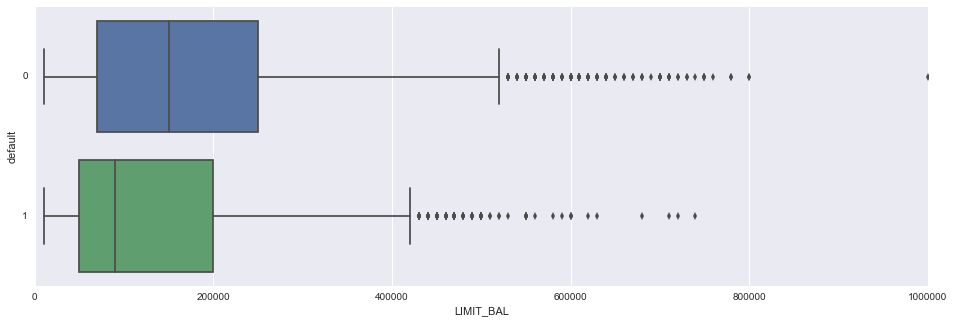

In [35]:
plt.figure(figsize(16, 5))

sns.boxplot(data=data[['default', 'LIMIT_BAL']], x='LIMIT_BAL', y='default', orient='h')

pylab.show()

Кажется, что медианы должны быть разные.

**Нулевая гипотеза Н0**: медиана первой выборки совпадает с медианой второй выборки

**Альтернативная гипотеза Н1**: общая альтернатива, т.е. медианы двух выборок не совпадают

Сделаем оценки медиан, вкл. интервальные, с помощью бутстрепа.

In [36]:
#
# Вспомогательные процедуры. Честно скопированы из лекций
#
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

#
# Подготовим данные и посмотрим на медианы
#
not_paid = data[data['default'] == 1]['LIMIT_BAL'].values
paid = data[data['default'] == 0]['LIMIT_BAL'].values

print "Median for those who didn't pay:", np.median(not_paid)
print "Median for those who paid:", np.median(paid)

Median for those who didn't pay: 90000.0
Median for those who paid: 150000.0


In [37]:
#
# Интервальные оценки каждой медианы
#
np.random.seed(0)

not_paid_median_scores = map(np.median, get_bootstrap_samples(not_paid, 1000))
paid_median_scores = map(np.median, get_bootstrap_samples(paid, 1000))

print "95% confidence interval for the credit limit median for those who didn't pay:",  \
                stat_intervals(not_paid_median_scores, 0.05)
print "95% confidence interval for the credit limit median for those who paid:",  \
                stat_intervals(paid_median_scores, 0.05)

95% confidence interval for the credit limit median for those who didn't pay: [ 80000.  90000.]
95% confidence interval for the credit limit median for those who paid: [ 150000.  150000.]


In [38]:
#
# Точечная оценка разности медиан
#
print "difference between medians:", np.median(paid) - np.median(not_paid)

difference between medians: 60000.0


In [39]:
#
# Интервальная оценка разности медиан
#
delta_median_scores = map(lambda x: x[1] - x[0], zip(not_paid_median_scores, paid_median_scores))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [ 60000.  70000.]


Видим, что интервальные оценки медиан не пересекаются, а интервальная оценка разности медиан не содержит 0. То есть, приближенный достигаемый уровень значимости бутстреп-критерия равен 0. Таким образом, уверенно отвергаем нулевую гипотезу.

Медианы выборок различаются.

Далее проверим гипотезу о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. 

**Нулевая гипотеза Н0**: распределения размеров кредитов среди выплативших кредит и ~~злостных~~ неплательщиков равны: $F_{X_1}(x) = F_{X_2}(x)$

**Альтернативная гипотеза Н1**: распределения размеров кредитов различаются: $F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

Будем проверять с помощью перестановочного критерия.

In [40]:
#
# Необходимые процедуры. Снова честно скопированные из лекций.
#
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [41]:
print "p-value: %f" % permutation_test(paid, not_paid, max_permutations = 10000)

p-value: 0.000100


Получили достигаемый уровень значимости заметно меньше 0.05. Можем уверенно отвергнуть нулевую гипотезу на уровне значимости 0.05.

Распределения значений кредитов различаются.

Касательно оценки эффекта и практической значимости полученных результатов. Размер эффекта по выборке будет равен 150000 - 90000 = 60000. 

ИМХО, практическая значимость невелика: ну и что из того, что медианное значение размеров проблемных кредитов отличается от медианного хороших кредитов? Медиана может быть очень обманчива; среднее и медиана могут различаться очень сильно. Впрочем, я не знаю, какие измерения и критерии используют банки. Лично я бы не полагался на значение медианы.

Также, неясно, какой практический вывод можно сделать из того, что два распределения различаются.

### 2. Пол

In [42]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Непонятно, кто есть ху, то есть, кто дяди, а кто тёти. Давайте предположим, что дяди - это 2 (их больше).

Выборка Х1 (paid) ~ Ber(p1)

Выборка Х2 (not_paid) ~ Ber(p2)

**Нулевая гипотеза Н0**: p1 = p2, т.е. гендерный состав выборок одинаков

**Альтернативная гипотеза Н1**: p1 <> p2, т.е. гендерный состав выборок различается

Сделаем оценку наших данных методом пристального взгляда:

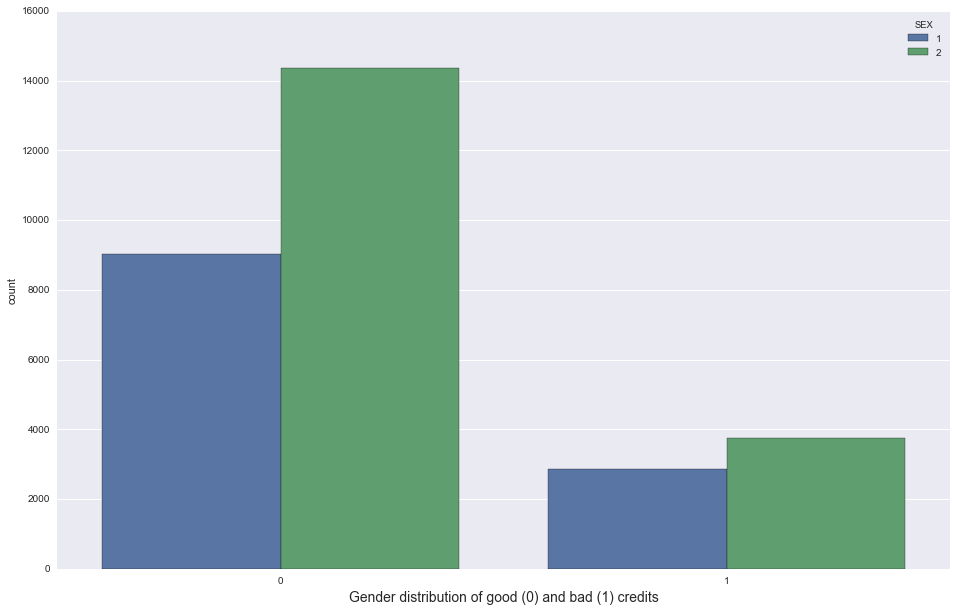

In [43]:
plt.figure(figsize(16, 10))

sns.countplot(data=data, x='default', hue='SEX')
plt.xlabel('Gender distribution of good (0) and bad (1) credits', fontsize=14)

pylab.show()

Кажется, что гендерный состав неодинаков. Проверим же!

Заменим двойки на единички, а единички на нолики, чтобы работать с нулями и единицами, как в учебнике. Теперь дядям соответствуют единички, а тётям нолики. Таким образом, мы получим распределения Бернулли и сможем применить соответствующие параметрические критерии.

In [44]:
paid = data[data['default'] == 0]['SEX'].values - 1
not_paid = data[data['default'] == 1]['SEX'].values - 1

In [45]:
#
# Необходимые процедуры. По уже сложившейся хорошей традиции скопируем их из лекций.
#
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = sc.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - sc.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return sc.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - sc.stats.norm.cdf(z_stat)

In [46]:
print "p-value: %e" % proportions_diff_z_test(proportions_diff_z_stat_ind(paid, not_paid))

print "95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(paid, not_paid)

p-value: 4.472867e-12
95% confidence interval for a difference between proportions: [0.033635, 0.060548]


Получили, что достигаемый уровень значимости заметно меньше 0.05. Доверительный интервал для разницы гендерных составов не включает ноль.

Можем уверенно отвергнуть нулевую гипотезу на уровне значимости 0.05.

Гендерный состав групп вернувших и не вернувших кредиты различается.

### 3. Образование

In [47]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

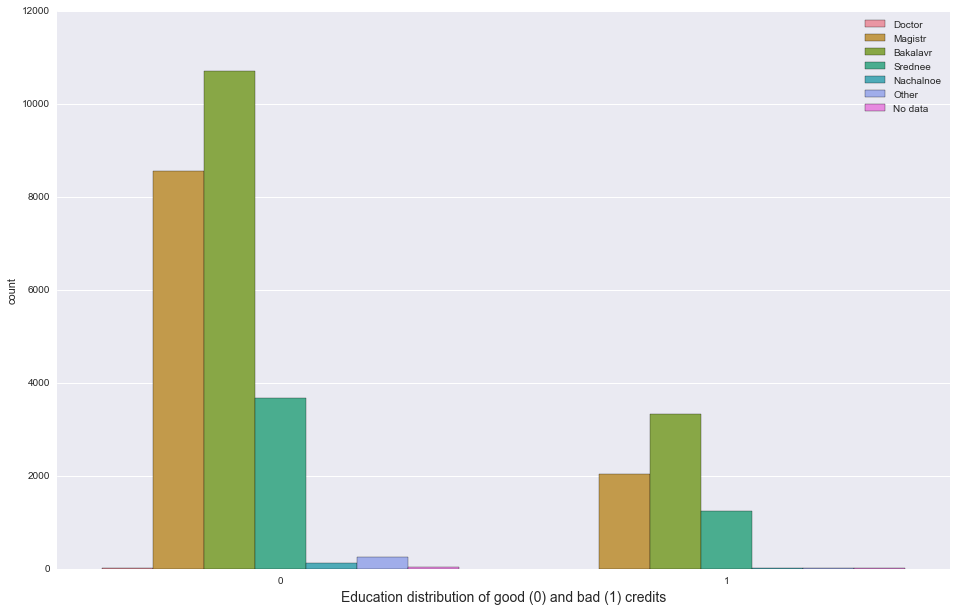

In [48]:
plt.figure(figsize(16, 10))

sns.countplot(data=data, x='default', hue='EDUCATION')
plt.xlabel('Education distribution of good (0) and bad (1) credits', fontsize=14)

# образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных
plt.legend(labels=['Doctor', 'Magistr', 'Bakalavr', 'Srednee', 'Nachalnoe', 'Other', 'No data'])

pylab.show()

Любопытная картинка. Хорошо видны распределения людей с Магистром, Бакалавром и Среднимю
Кажется, что распределение людей похоже.

Разберемся с формулировкой гипотез.

У нас есть, по сути, два категориальных признака: один принимает 7 значений, а другой 2. Оценим степень корреляции между ними с помощью критерия хи-квадрат (или просто хи-хи).

**Нулевая гипотеза Н0**: признаки 'EDUCATION' и 'default' независимы

**Альтернативная гипотеза Н1**: зависимость между указанными признаками есть

In [49]:
#
# Построим таблицу сопряженности 
#
educs = {0:'Doctor', 1:'Magistr', 2:'Bakalavr', 3:'Srednee', 4:'Nachalnoe', 5:'Other', 6:'No data'}

tbl = pd.DataFrame(np.zeros((7, 2)))

for key in educs:
    # Заполняем строку таблицы:
    tbl.iloc[key, 0] = float(data[(data['default'] == 0) & (data['EDUCATION'] == key)].shape[0])
    tbl.iloc[key, 1] = float(data[(data['default'] == 1) & (data['EDUCATION'] == key)].shape[0])
    
tbl.index = educs.values()
tbl.columns = ['Good Credit', 'Bad Credit']
tbl

,Good Credit,Bad Credit
Doctor,14.0,0.0
Magistr,8549.0,2036.0
Bakalavr,10700.0,3330.0
Srednee,3680.0,1237.0
Nachalnoe,116.0,7.0
Other,262.0,18.0
No data,43.0,8.0


In [50]:
#
# Применяем критерий хи-хи
#
(chi, p, df, expected) = chi2_contingency(tbl)
print "p-value: %e" % p

p-value: 1.233263e-32


Значение p-value очень маленькое. Поэтому на уровне значимости 0.05 мы можем отвергнуть гипотезу о том, что эти два признака независимы.

Между признаками есть связь.

Разберемся со способом наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Нарисуем таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Ожидаемое количество человек мы уже получили в результате вызова chi2_contingency()

In [51]:
tbl2 = tbl - expected
tbl2  

,Good Credit,Bad Credit
Doctor,3.0968,-3.0968
Magistr,305.4020,-305.4020
Bakalavr,-226.5640,226.5640
Srednee,-149.3596,149.3596
Nachalnoe,20.2076,-20.2076
Other,43.9360,-43.9360
No data,3.2812,-3.2812


Как же теперь модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости? 
Давайте по-другому считать ячейки. В каждую ячейку будем записывать отношение наблюдаемого числа человек к ожидаемому и умножать на 100, чтобы получить проценты.

Получим процент от ожидаемого числа возвращенцев/невозвращенцев.

In [52]:
tbl3 = tbl / expected * 100
tbl3

,Good Credit,Bad Credit
Doctor,128.402671,0.000000
Magistr,103.704717,86.956447
Bakalavr,97.926484,107.300424
Srednee,96.099619,113.732443
Nachalnoe,121.095202,25.728105
Other,120.148213,29.062258
No data,108.261075,70.914442


Сразу любопытно: 0% от ожидаемого числа Докторов не вернули кредит. Это означает, что все Доктора кредит возвращают. Какие молодцы!

Ну и, отвечая на два последних вопроса, получается, что:

* наличие образования "Доктор" является наилучшим индикатором того, что человек отдаст кредит
* наличие Среднего образования является наилучшим индиктором того, что человек не отдаст кредит

### 4. Семейное положение

In [53]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

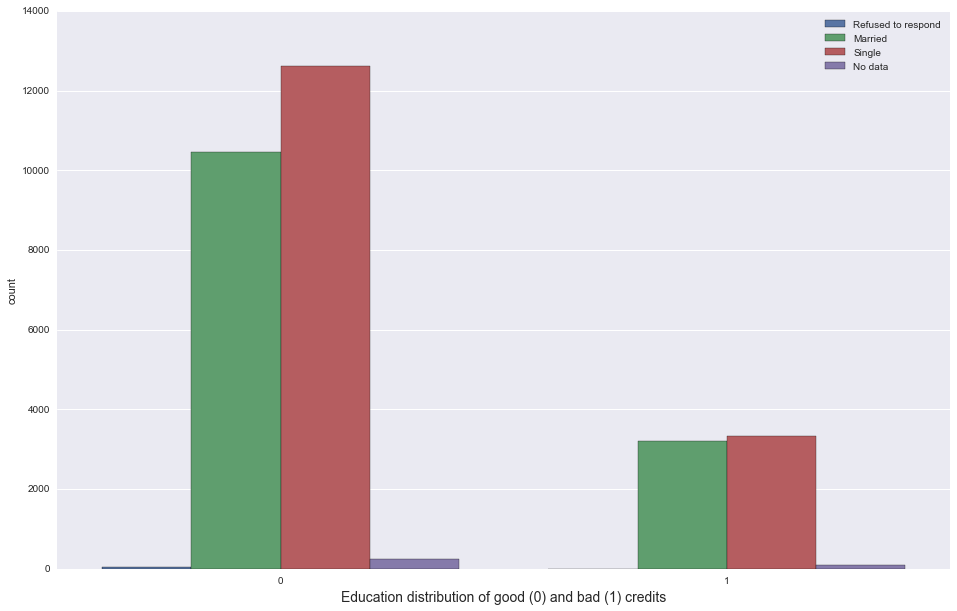

In [54]:
plt.figure(figsize(16, 10))

sns.countplot(data=data, x='default', hue='MARRIAGE')
plt.xlabel('Education distribution of good (0) and bad (1) credits', fontsize=14)

# Семейное положение (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных)
plt.legend(labels=['Refused to respond', 'Married', 'Single', 'No data'])

pylab.show()

У нас опять есть два категориальных признака: один принимает 4 значения, а другой 2. Оценим, есть ли связь между ними, с помощью критерия хи-хи.

**Нулевая гипотеза Н0**: признаки 'MARRIAGE' и 'default' независимы

**Альтернативная гипотеза Н1**: зависимость между указанными признаками есть

Построим таблицу сопряженности двух категориальных признаков - MARRIAGE и default. К ней применим критерий, получим хи-статистику и на ее основании посчитаем коэффициент корреляции V Кармера.

In [55]:
statuses = {0:"Refused to respond", 1:"Married", 2:"Single", 3:"No data"}

tbl4 = pd.DataFrame(np.zeros((4, 2)))

for key in statuses:
    # Заполняем строку таблицы:
    tbl4.iloc[key, 0] = float(data[(data['default'] == 0) & (data['MARRIAGE'] == key)].shape[0])
    tbl4.iloc[key, 1] = float(data[(data['default'] == 1) & (data['MARRIAGE'] == key)].shape[0])
    
tbl4.index = statuses.values()
tbl4.columns = ['Good Credit', 'Bad Credit']
tbl4

,Good Credit,Bad Credit
Refused to respond,49.0,5.0
Married,10453.0,3206.0
Single,12623.0,3341.0
No data,239.0,84.0


In [56]:
(chi, p, df, expected) = chi2_contingency(tbl4)

print "p-value: %e" % p

p-value: 8.825862e-08


Снова значение p-value очень маленькое. Поэтому на уровне значимости 0.05 мы можем отвергнуть гипотезу о том, что эти два признака независимы.

Между признаками есть связь.

In [57]:
#
# Посчитаем коэффициент V Крамера:
#
cramer = np.sqrt(chi / (tbl4.sum().sum() * (min(tbl4.shape[0], tbl4.shape[1]) - 1)))

print "V Cramer correlation coefficient:", cramer

V Cramer correlation coefficient: 0.0344782036628


Вот тут, признаться, я теряюсь.

С одной стороны, мы получили p-value сильно маленькое (8й значащий знак) и можем утверждать, что связь между этими двумя признаками есть.

С другой стороны, коэффициент V Крамера получился очень маленький, 0.034, и очень хочется сказать, что связь между этими ~~почти отсутствует~~ очень-очень мала...

Дорогие сокурники! Если кто-то из Вас доберется до этого места и заметит косяк в моих рассуждениях, то напишите пожалуйста в комментарии к работе. Большое Вам спасибо!!!

### 5. Возраст

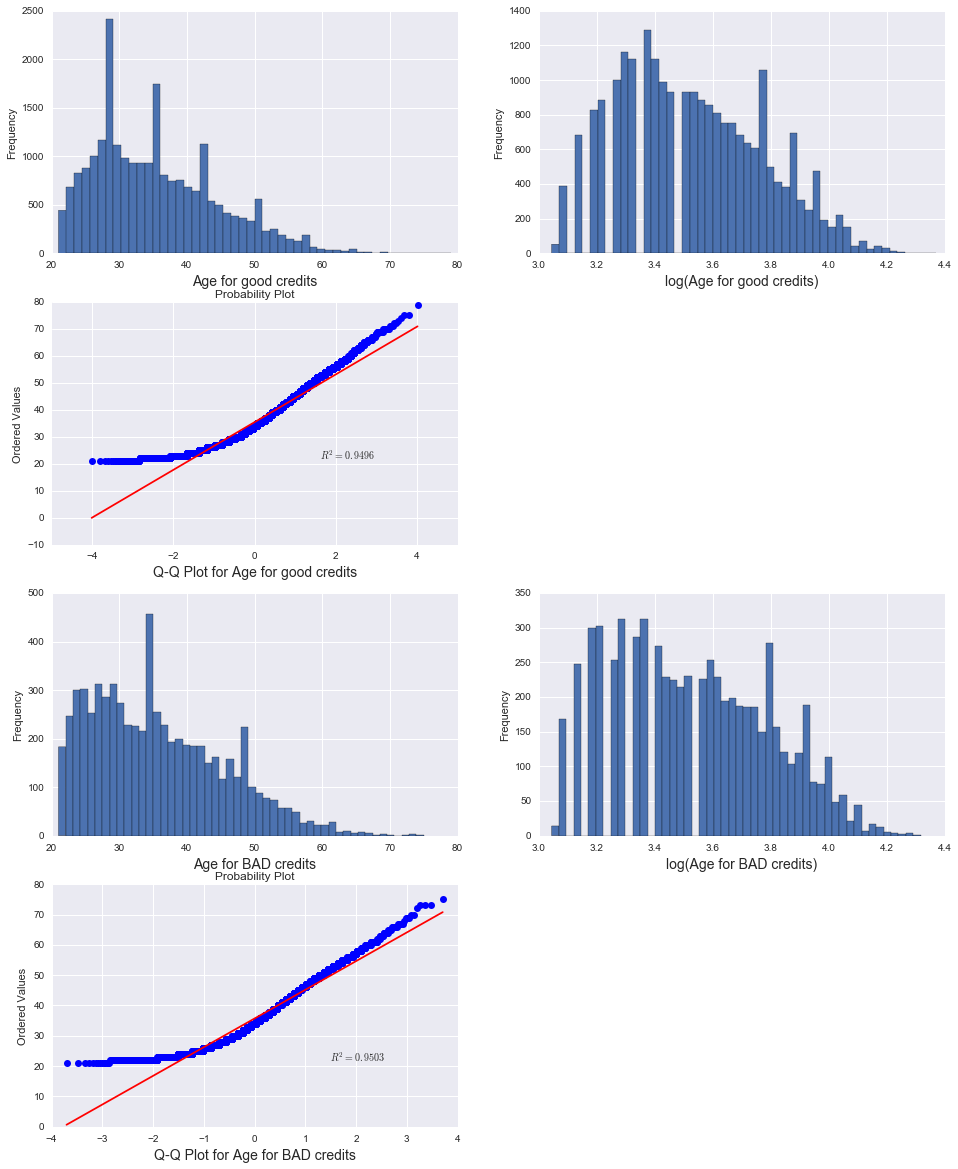

In [58]:
plt.figure(figsize(16, 20))

plt.subplot(421)
data[data['default'] == 0]['AGE'].plot.hist(bins=50)
plt.xlabel('Age for good credits', fontsize=14)

plt.subplot(422)
np.log(data[data['default'] == 0]['AGE']).plot.hist(bins=50)
plt.xlabel('log(Age for good credits)', fontsize=14)

plt.subplot(423)
sc.stats.probplot(data[data['default'] == 0]['AGE'], dist="norm", plot=pylab)
plt.xlabel('Q-Q Plot for Age for good credits', fontsize=14)

plt.subplot(425)
data[data['default'] == 1]['AGE'].plot.hist(bins=50)
plt.xlabel('Age for BAD credits', fontsize=14)

plt.subplot(426)
np.log(data[data['default'] == 1]['AGE']).plot.hist(bins=50)
plt.xlabel('log(Age for BAD credits)', fontsize=14)

plt.subplot(427)
sc.stats.probplot(data[data['default'] == 1]['AGE'], dist="norm", plot=pylab)
plt.xlabel('Q-Q Plot for Age for BAD credits', fontsize=14)

pylab.show()

Распределение возрастов в каждой выборке не похоже на нормальное. Логарифм возрастов не сильно помогает.
Ку-ку-плот подтверждает, что выборки не из нормальных распределений.
Интересно, кстати: тут похоже порог в районе 21 года: возраст, с которого начинают выдавать кредиты.

Так или иначе, сделать предположение о нормальности исходных выборок не можем.
Таким образом, задачу будем решать непараметрическими критериями.

Опять отметим, что выборки у нас, по ходу, независимые. Это понадобится.

Нарисуем "ящики с усами" для каждой из выборок.

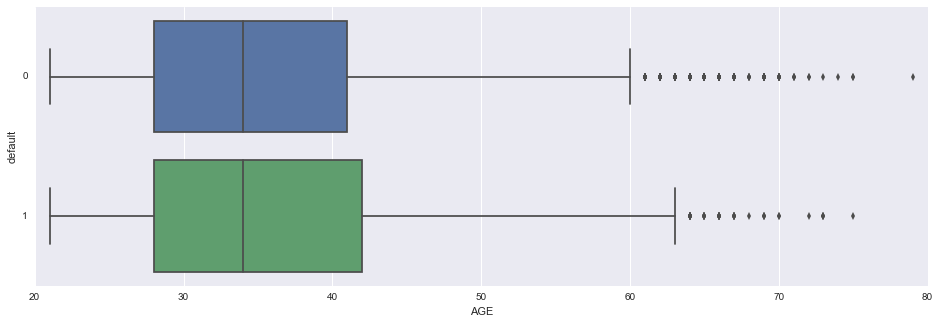

In [59]:
plt.figure(figsize(16, 5))

sns.boxplot(data=data[['default', 'AGE']], x='AGE', y='default', orient='h')

pylab.show()

А вот тут кажется, что медианы должны быть очень похожи! Хоть какое-то отличие от первого вопроса ;)

**Нулевая гипотеза Н0**: медиана первой выборки совпадает с медианой второй выборки

**Альтернативная гипотеза Н1**: общая альтернатива, т.е. медианы двух выборок не совпадают

Сделаем оценки медиан, вкл. интервальные, с помощью бутстрепа.

In [60]:
#
# Подготовим данные и посмотрим на медианы
#
not_paid = data[data['default'] == 1]['AGE'].values
paid = data[data['default'] == 0]['AGE'].values

print "Median of Age for those who didn't pay:", np.median(not_paid)
print "Median of Age for those who paid:", np.median(paid)

Median of Age for those who didn't pay: 34.0
Median of Age for those who paid: 34.0


In [61]:
#
# Интервальные оценки каждой медианы
#
np.random.seed(0)

not_paid_median_scores = map(np.median, get_bootstrap_samples(not_paid, 1000))
paid_median_scores = map(np.median, get_bootstrap_samples(paid, 1000))

print "95% confidence interval for the age median for those who didn't pay:",  \
                stat_intervals(not_paid_median_scores, 0.05)
print "95% confidence interval for the age median for those who paid:",  \
                stat_intervals(paid_median_scores, 0.05)

95% confidence interval for the age median for those who didn't pay: [ 34.  35.]
95% confidence interval for the age median for those who paid: [ 34.  34.]


In [62]:
#
# Точечная оценка разности медиан
#
print "difference between medians:", np.median(paid) - np.median(not_paid)

difference between medians: 0.0


In [63]:
#
# Интервальная оценка разности медиан
#
delta_median_scores = map(lambda x: x[1] - x[0], zip(not_paid_median_scores, paid_median_scores))
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [-1.  0.]


Видим, что интервальные оценки медиан пересекаются. Интервальная оценка разности медиан содержит 0. Отвергнуть нулевую гипотезу не можем.

Медианы выборок совпадают.

Далее проверим гипотезу о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. 

**Нулевая гипотеза Н0**: распределения возрастов людей, выплативших кредит, и неплательщиков равны: $F_{X_1}(x) = F_{X_2}(x)$

**Альтернативная гипотеза Н1**: распределения возрастов различаются: $F_{X_1}(x) = F_{X_2}(x + \Delta), \Delta\neq 0$

Будем проверять с помощью перестановочного критерия.

In [64]:
print "p-value: %f" % permutation_test(paid, not_paid, max_permutations = 10000)

p-value: 0.017400


Получили достигаемый уровень значимости меньше 0.05. Можем уверенно отвергнуть нулевую гипотезу на уровне значимости 0.05.

Распределения возрастов различаются.

Касательно размера эффекта и практической значимости полученных результатов. Размер эффекта по выборкам равен нулю. ИМХО, практическая значимость снова невелика: ну и что из того, что медианное значение возрастов для проблемных кредитов совпадает с медианой для хороших кредитов? Также, опять неясно, какой практический вывод можно сделать из того, что два распределения различаются.